In [1]:
%run "header.ipynb"

/home/lovro/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/lovro/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


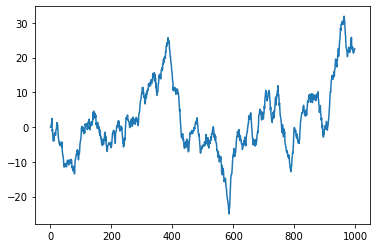

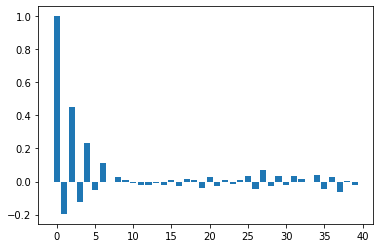

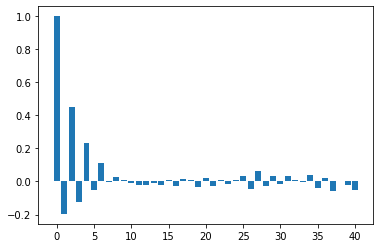

In [2]:
c_0 = 0.001 
c_1 = -0.1
c_2 = 0.4
sigma = 1.0
Nt = 1000
Nr = 1
a = 3
r = np.zeros([Nt,Nr])
P = np.ones([Nt,Nr])
z = np.random.RandomState().normal(0, 1, [Nt, Nr])

x = range(Nt)
for t in x[3:Nt] :
    r[t] = c_0 + c_1*r[t-1] + c_2*r[t-2] + sigma*z[t]
    P[t,:] = P[t-1,:] * np.exp(r[t,:])
    
for run in range(Nr):
    plt.plot(x, np.log(P[:,run]).transpose());

draw_acf(r, max_order = 40)
draw_acf(r, stat_tools = True)

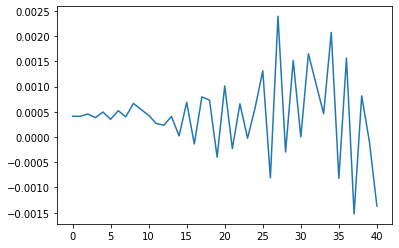

In [3]:
a = acf(r[:, 0], max_order = 41)
b = stattools.acf(r[:, 0])
plt.plot(range(41), a[:, 0] - b)
plt.show()